# Running GRASS in Jupyter Notebooks in Mac

*Notes*
  - This following setup was completed with GRASS GIS 8.2.0 stable and GRASS GIS 8.3.dev (83da642737) compiled with [grass-conda](https://github.com/nilason/grass-conda)

## Set Up
Similar to Linux on MacOS we can install jupyter lab with the system python and use grass jupyter without launching a grass session directly.


##### *1. Install Jupyter Lab*
Python on MacOS defaults to python2 so when we use python we need to explicitly call python3 and pip3 to make sure our package installs with the correct version. To install open *Terminal.App* or whatever terminal emulator you use, and run the following command

```bash
pip3 install jupyterlab
```


##### *2. Finding where grass lives*
Applications on MacOS install into `/Applications` as such in order to use grass from the CLI, we need to point to the executable. The executable lives at `/Applications/GRASS-versionnumber/Contents/Resources/bin/grass`. The version number will change with new releases, so we can automaticallty find it with either of the following commands

in `bash`
```bash
find /Applications -name 'GRASS*' -type d -maxdepth 1
```

in `python`
```python
from pathlib import Path
grass_call = list(Path("/Applications").glob("GRASS*"))[0] / "Contents" / "Resources" / "bin" / "grass"
```

## Start

When using Python in notebook, we usually find GRASS GIS Python packages, import them, initialize GRASS GIS session, and set several variables useful for using GRASS GIS in a notebook.

In [1]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
from IPython.display import Image
from pathlib import Path

# Ask GRASS GIS where its Python packages are.
# Get location of grass binary
grass_app = list(Path("/Applications").glob("GRASS*"))
print(f"GRASS version(s) found : {grass_app}")

# We choose the first version of grass available
grass_call = grass_app[0] / "Contents" / "Resources" / "bin" / "grass"
print(f"Using GRASS located @ {str(grass_call)}")

# Check python path
sys.path.append(subprocess.check_output([grass_call, "--config", "python_path"], text=True).strip())

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Create a GRASS GIS session.
gj.init("../data", "nc_spm_08_grass7", "user1")

GRASS version(s) found : [PosixPath('/Applications/GRASS-8.3.app'), PosixPath('/Applications/GRASS-8.2.app')]
Using GRASS located @ /Applications/GRASS-8.3.app/Contents/Resources/bin/grass


## Using GRASS

Now that we have GRASS GIS running in our notebook, let's try some basic commands. 

In this section, we create an elevation map from the sample GRASS GIS dataset for North Carolina, USA. 

First, we set computational region.

In [2]:
# Set computational region to the study area.
gs.parse_command('g.region', raster="elevation", flags='pg')
# Set colors for elevation raster
gs.run_command('r.colors', map="elevation", color="elevation")

Then, we'll make our first map.

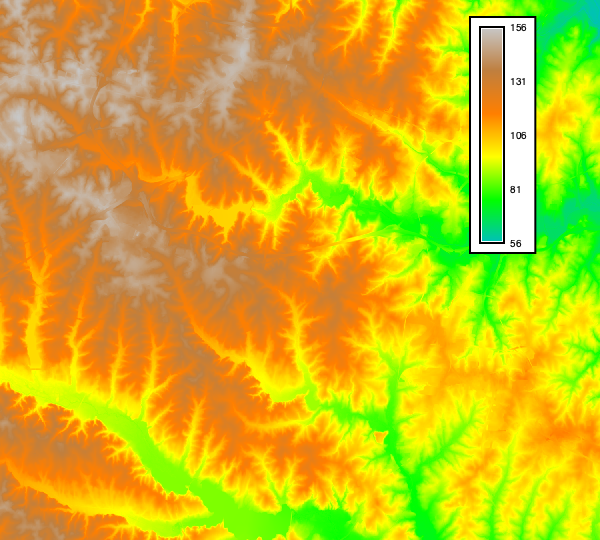

In [3]:
# Create GrassRenderer instance
img = gj.Map()
# Add a raster, vector and legend to the map
img.d_rast(map="elevation")
img.d_legend(raster="elevation", at=(55, 95, 80, 84), flags="b")
# Display map
img.show()

Now, we're up and running! It may be useful to copy the paths from Step 7 somewhere easy to find for the future.